In [2]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
print('imported numpy and astropy', flush=True)
from galpy.df import streamdf
from galpy.orbit import Orbit
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.util import conversion #for unit conversions
from galpy.util.conversion import get_physical
print('imported galpy', flush=True)
from galpy.potential.mwpotentials import MWPotential2014
print('imported MW14 potential', flush=True)

imported numpy and astropy
A new version of galpy (1.8.3) is available, please upgrade using pip/conda/... to get the latest features and bug fixes!
imported galpy
imported MW14 potential


In [3]:
# Potential
Potential = MWPotential2014
ro = get_physical(MWPotential2014)['ro']
vo = get_physical(MWPotential2014)['vo']

In [4]:
np.random.seed(1)

# define progenitors: Orbit instances (R,vR,vT,Z,vZ,ϕ)
l=40
n=25
v = 100
Gyrs = np.random.uniform(2,5,n)
phis = np.random.uniform(0,360,n)*u.deg
Rs  = np.random.uniform(15,l,n)*u.kpc
Zs  = np.random.uniform(-l,l,n)*u.kpc
vRs = np.random.uniform(-v,v,n)*u.km/u.s
vTs = np.random.uniform(-v,0,n)*u.km/u.s
vZs = np.random.uniform(-v,v,n)*u.km/u.s

# action angle instance
aAI= actionAngleIsochroneApprox(pot=Potential,b=0.5)

os = []
sdfs = []
j = 0
for i in np.arange(n): 
    try:
        o = Orbit([Rs[i],vRs[i],vTs[i],Zs[i],vZs[i],phis[i]])
        # instantiate the streamdf model
        sigv= 0.01
        print('test', flush=True)
        print(np.sqrt(Rs[i]**2+Zs[i]**2),np.sqrt(vRs[i]**2+vTs[i]**2+vZs[i]**2), Gyrs[i], flush=True)
        sdf= streamdf(sigv,progenitor=o,pot=Potential,aA=aAI,leading=True,nTrackChunks=11,tdisrupt=Gyrs[i]/conversion.time_in_Gyr(vo,ro))
        os.append(o)
        sdfs.append(sdf)
        print(i,': yes', flush=True)
        j = j+1
        if j>=10:
                break
    except:
        print(i,': nah', flush=True)

test
30.927037499441465 kpc 103.2331737636702 km / s 3.251066014107722
0 : yes
test
46.8169269879156 kpc 103.74417673545533 km / s 4.160973480326474
1 : yes
test
23.66504000237242 kpc 79.95687254421418 km / s 2.0003431244520344
/home/claudia/miniconda3/envs/astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:236: RuntimeWarning: invalid value encountered in sqrt
  Jr= self.amp/numpy.sqrt(-2.*E)\

/home/claudia/miniconda3/envs/astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:239: RuntimeWarning: invalid value encountered in power
  Omegar= (-2.*E)**1.5/self.amp

/home/claudia/miniconda3/envs/astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:263: RuntimeWarning: invalid value encountered in sqrt
  tan11= numpy.arctan(numpy.sqrt((1.+e)/(1.-e))*numpy.tan(0.5*eta))

/home/claudia/miniconda3/envs/astro/lib/python3.10/site-packages/galpy/actionAngle/actionAngleIsochrone.py:264: RuntimeWarning: invalid value encoun

In [5]:
N = j
# rows represent streams, columns: star within stream 
x  = np.empty((N, 50))
y  = np.empty((N, 50))
z  = np.empty((N, 50))
E  = np.empty((N, 50))
Lz = np.empty((N, 50))
L  = np.empty((N, 50))
e  = np.empty((N, 50))

for i in np.arange(N):
    RvR= sdfs[i].sample(n=50)
    stream = Orbit(RvR.T)
    x[i,:] = stream.x()
    y[i,:] = stream.y()
    z[i,:] = stream.z()

    E[i,:] = stream.E(pot=Potential)
    Lz[i,:] = stream.Lz()
    L[i,:] = np.sqrt(np.sum(stream.L()**2, axis=1))
    e[i,:]  = stream.e(pot = Potential, analytic=True, type= 'staeckel')

E_fl = E.flatten()
Lz_fl = Lz.flatten()
L_fl = L.flatten()
e_fl = e.flatten()
x_fl = x.flatten()
y_fl = y.flatten()
z_fl = z.flatten()

arr = np.empty((10,50))
for i in np.arange(10):
    arr[i,:]=i*np.ones(50)
d_fl = arr.flatten()

Data = np.array((x_fl, y_fl, z_fl, E_fl, Lz_fl, L_fl, e_fl, d_fl)).T
np.random.shuffle(Data)
np.savetxt('MW14sim10streams_xyz_E_Lz_L_e.csv',Data, delimiter=',')

print('done')


done


In [6]:
Data = np.loadtxt('MW14sim10streams_xyz_E_Lz_L_e.csv', delimiter=',')
XYZ = Data[:,:3]
mask0 =  Data[:,7] == 0
mask1 =  Data[:,7] == 1
mask2 =  Data[:,7] == 2
mask3 =  Data[:,7] == 3
mask4 =  Data[:,7] == 4
mask5 =  Data[:,7] == 5
mask6 =  Data[:,7] == 6
mask7 =  Data[:,7] == 7
mask8 =  Data[:,7] == 8
mask9 =  Data[:,7] == 9
data = Data[:,3:7]
clust0 = data[mask0]
clust1 = data[mask1]
clust2 = data[mask2]
clust3 = data[mask3]
clust4 = data[mask4]
clust5 = data[mask5]
clust6 = data[mask6]
clust7 = data[mask7]
clust8 = data[mask8]
clust9 = data[mask9]

<IPython.core.display.Javascript object>


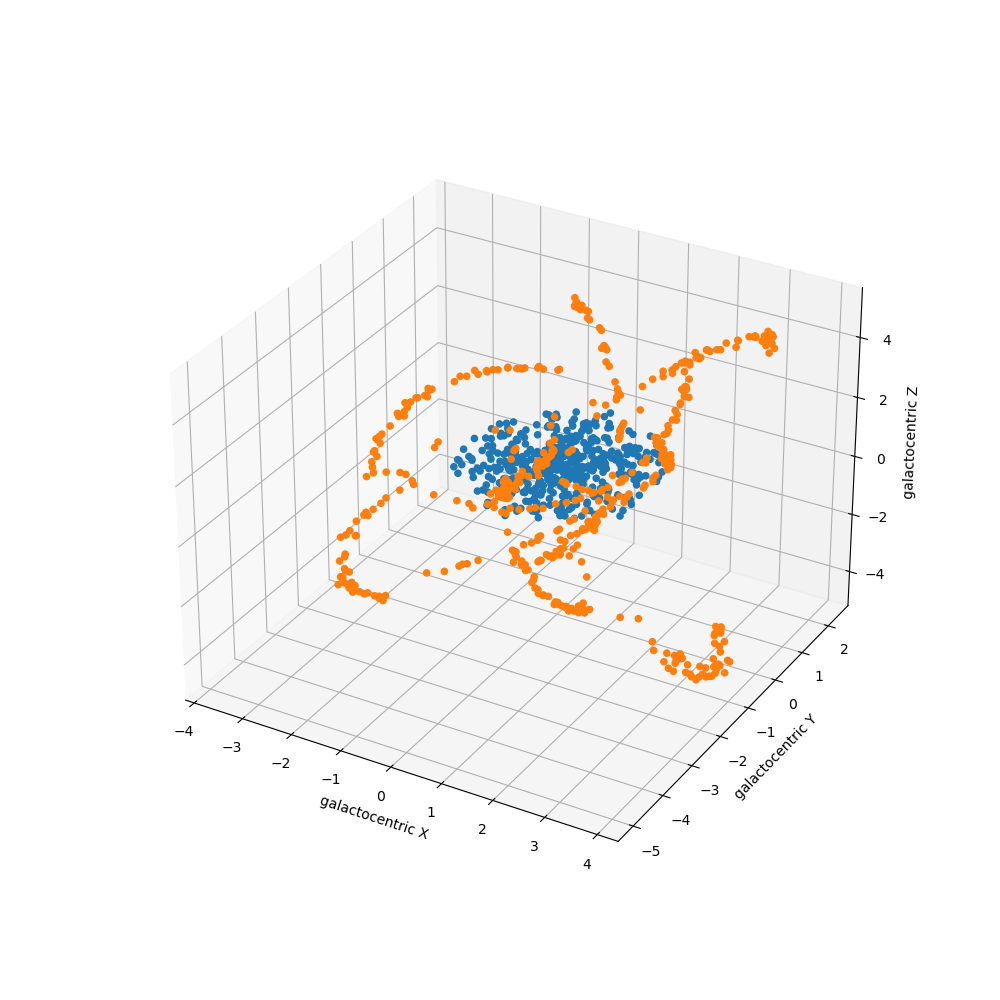

Text(0.5, 0, 'galactocentric Z')

In [7]:
%matplotlib notebook
plt.rcParams.update({'font.size':10})
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')


# representing the disk of galaxy
phiDisk = np.random.uniform(0,360,500)
RDisk  = np.random.uniform(0,15,500)/ro
ZDisk  = np.random.uniform(-2,2,500)/ro

XDisk, YDisk = RDisk*np.cos(phiDisk), RDisk*np.sin(phiDisk)
ax.scatter(XDisk,YDisk,ZDisk, alpha=1)
ax.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],alpha=1)

ax.set_xlabel('galactocentric X')
ax.set_ylabel('galactocentric Y')
ax.set_zlabel('galactocentric Z')

In [8]:
def plotClust(clust1):
    ax[0][0].scatter(clust1[:,1], clust1[:,0])
    ax[0][1].scatter(clust1[:,1], clust1[:,2])
    ax[0][2].scatter(clust1[:,3], clust1[:,1])
    ax[1][0].scatter(clust1[:,2], clust1[:,0])
    ax[1][1].scatter(clust1[:,3], clust1[:,2])
    ax[1][2].scatter(clust1[:,3], clust1[:,0])
def plotClust2(clust1, color):
    ax[0][0].scatter(clust1[:,1], clust1[:,0], c=color)
    ax[0][1].scatter(clust1[:,1], clust1[:,2], c=color)
    ax[0][2].scatter(clust1[:,3], clust1[:,1], c=color)
    ax[1][0].scatter(clust1[:,2], clust1[:,0], c=color)
    ax[1][1].scatter(clust1[:,3], clust1[:,2], c=color)
    ax[1][2].scatter(clust1[:,3], clust1[:,0], c=color)

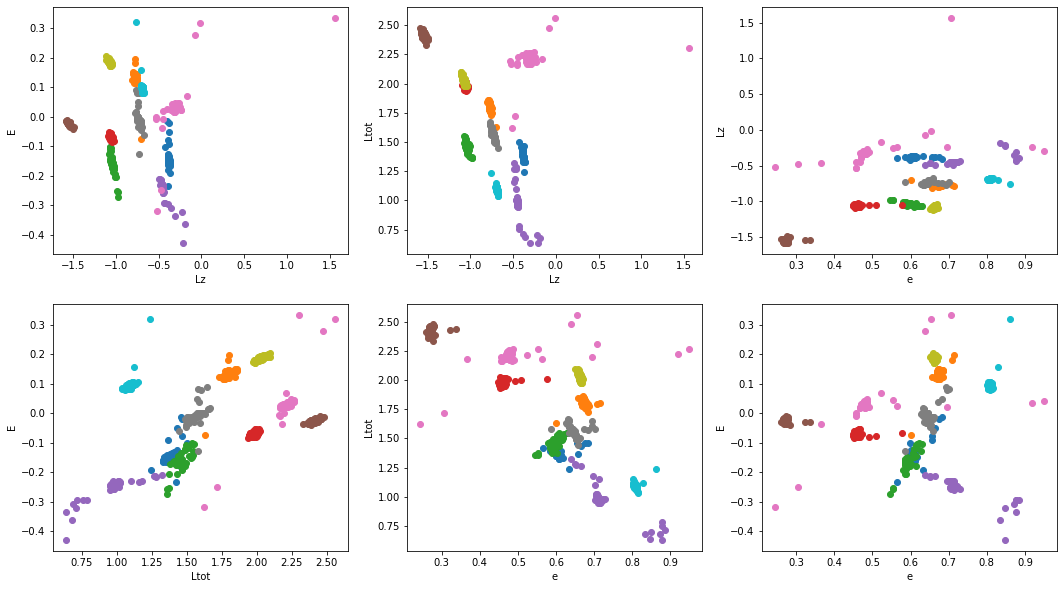

In [9]:
%matplotlib inline
plt.rcParams.update({'font.size':10})
fig, ax = plt.subplots(2, 3, figsize=(18,10))

plotClust(clust0)
plotClust(clust1)
plotClust(clust2)
plotClust(clust3)
plotClust(clust4)
plotClust(clust5)
plotClust(clust6)
plotClust(clust7)
plotClust(clust8)
plotClust(clust9)

ax[0][0].set_xlabel('Lz')
ax[0][1].set_xlabel('Lz')
ax[0][2].set_xlabel('e')
ax[1][0].set_xlabel('Ltot')
ax[1][1].set_xlabel('e')
ax[1][2].set_xlabel('e')

ax[0][0].set_ylabel('E')
ax[0][1].set_ylabel('Ltot')
ax[0][2].set_ylabel('Lz')
ax[1][0].set_ylabel('E')
ax[1][1].set_ylabel('Ltot')
ax[1][2].set_ylabel('E');


In [10]:
# DBScan Method
n_DB = [0.05,0.08,0.1, 0.12,0.2,0.3]
for i in n_DB:
        eps = i
        db = DBSCAN(eps=eps, min_samples=20).fit(data)
        DB_labels = db.labels_
        string = 'Sim_DB_labels'+str(eps)+'.csv'
        np.savetxt(string, DB_labels , delimiter=',')

0.05


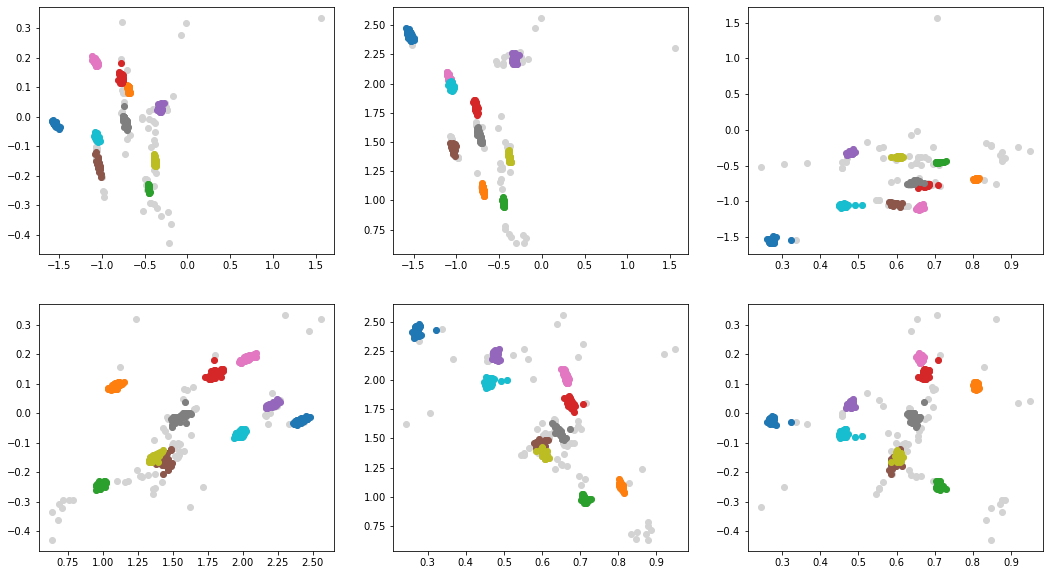

0.08


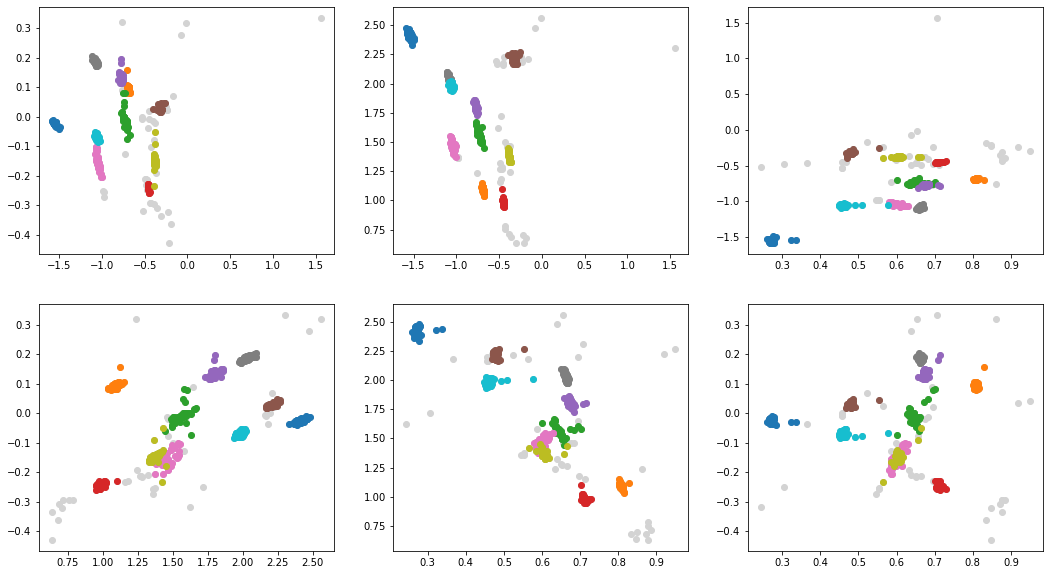

0.1


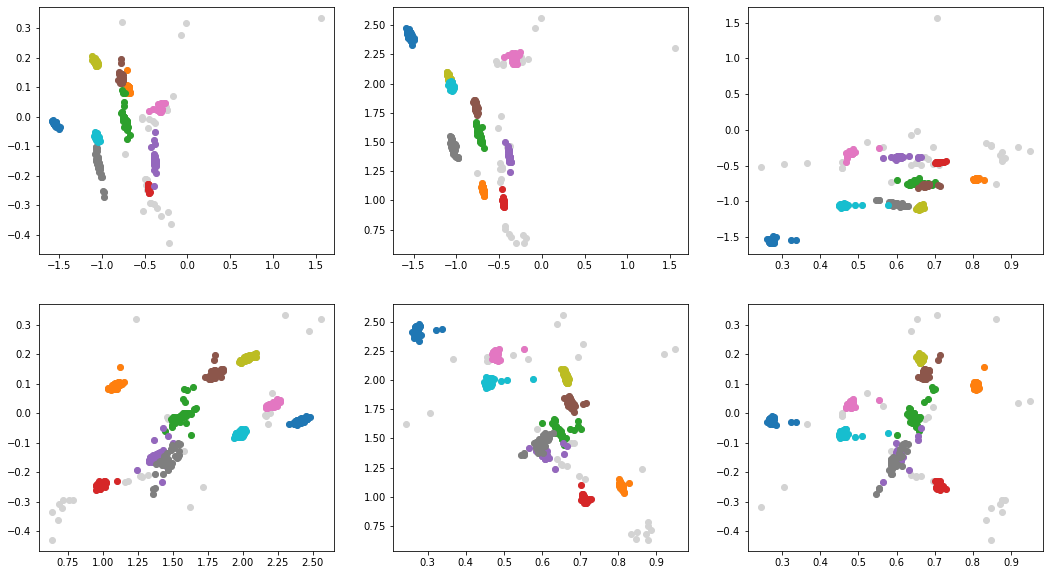

0.12


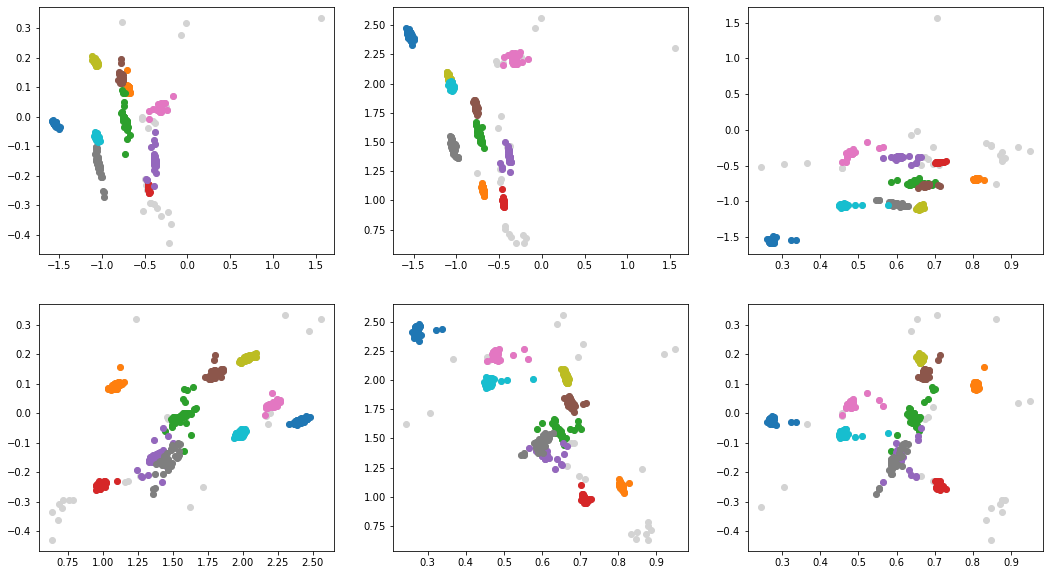

0.2


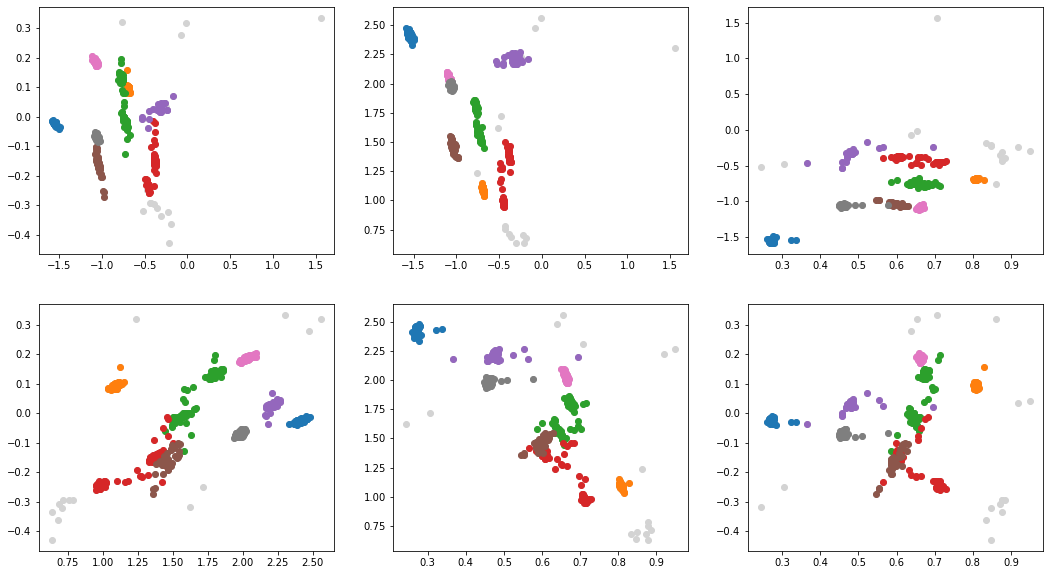

0.3


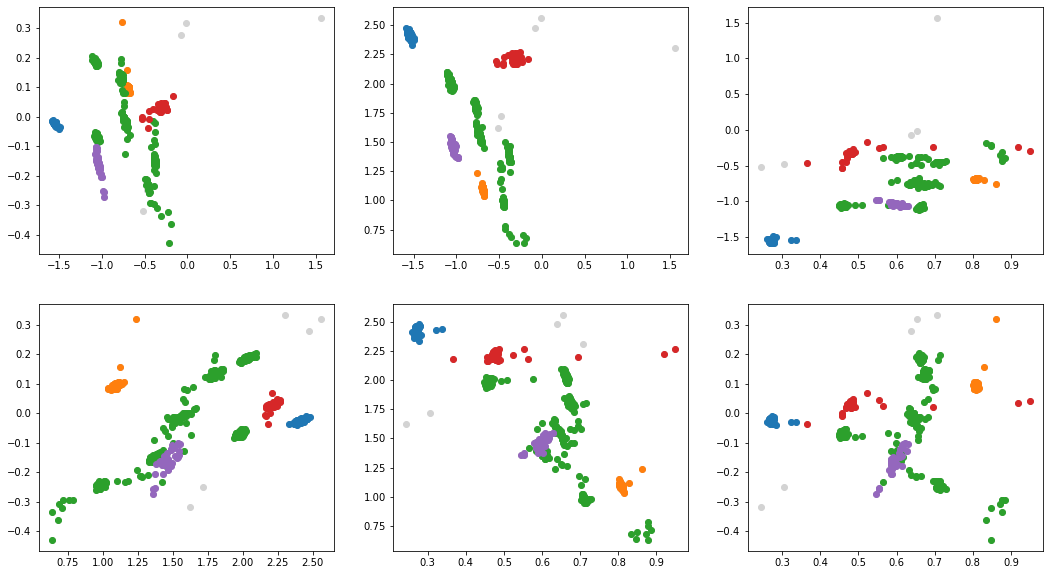

In [11]:
# DBScan Method Results
for i in n_DB:
        eps = i
        print(eps)
        string = 'Sim_DB_labels'+str(eps)+'.csv'
        DB_labels = np.loadtxt(string , delimiter=',')
        mx = np.max(DB_labels)
        plt.rcParams.update({'font.size':10})
        fig, ax = plt.subplots(2, 3, figsize=(18,10))
        plotClust2(data, 'lightgrey')
        for i in np.arange(mx+1):
            mask = (DB_labels == i)
            plotClust(data[mask])
        plt.show()

In [12]:
# OPTICS Method
n_opt= [0.001,0.1,0.5,0.6,0.7,0.8,0.9,0.99]
for i in n_opt:
        xi = i
        opt = OPTICS(xi=xi, min_samples=20).fit(data)
        OPT_labels = opt.labels_
        string = 'Sim_OPT_labels'+str(xi)+'.csv'
        np.savetxt(string, OPT_labels , delimiter=',')

0.001


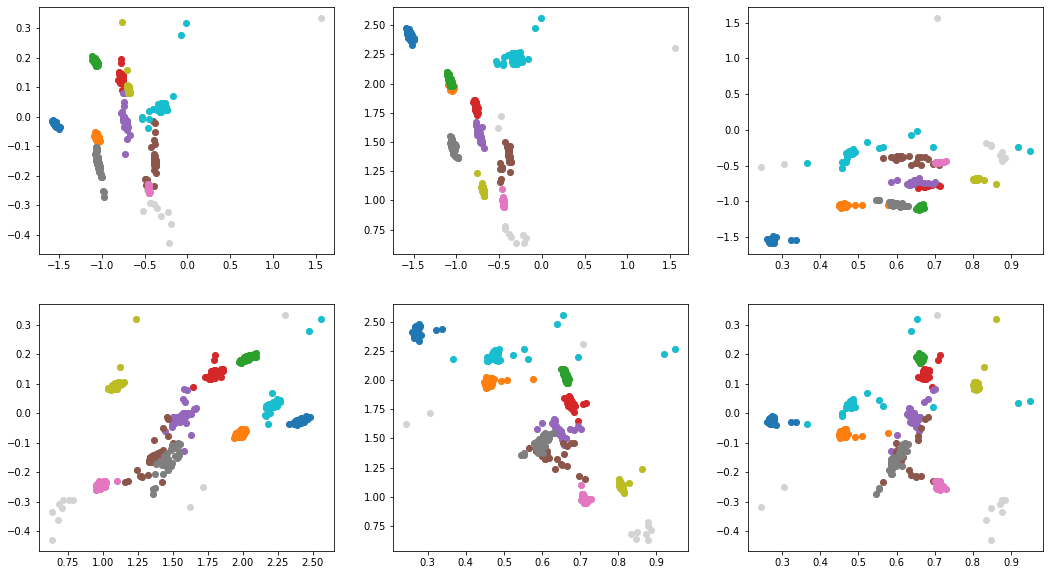

0.1


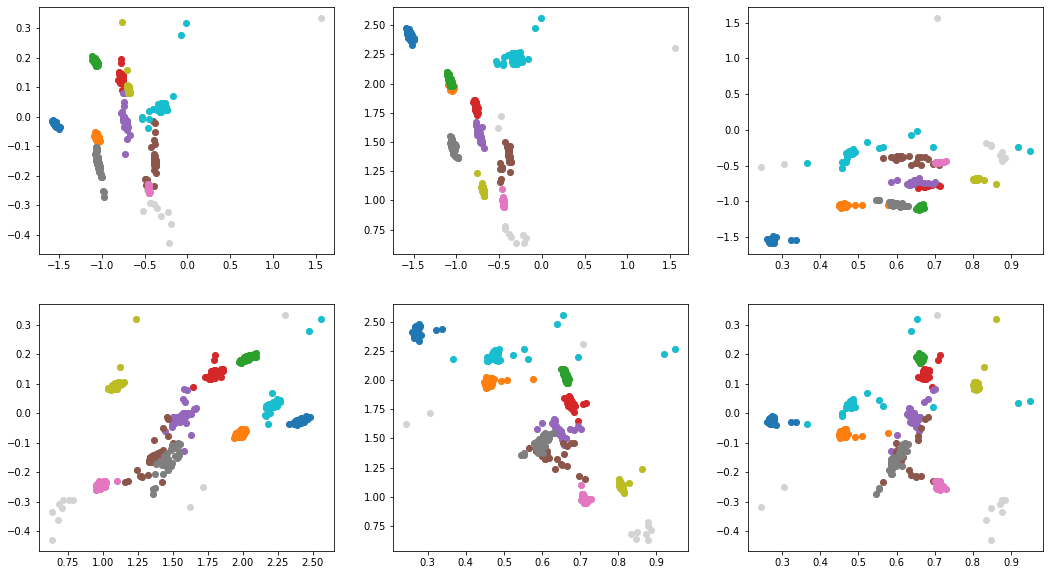

0.5


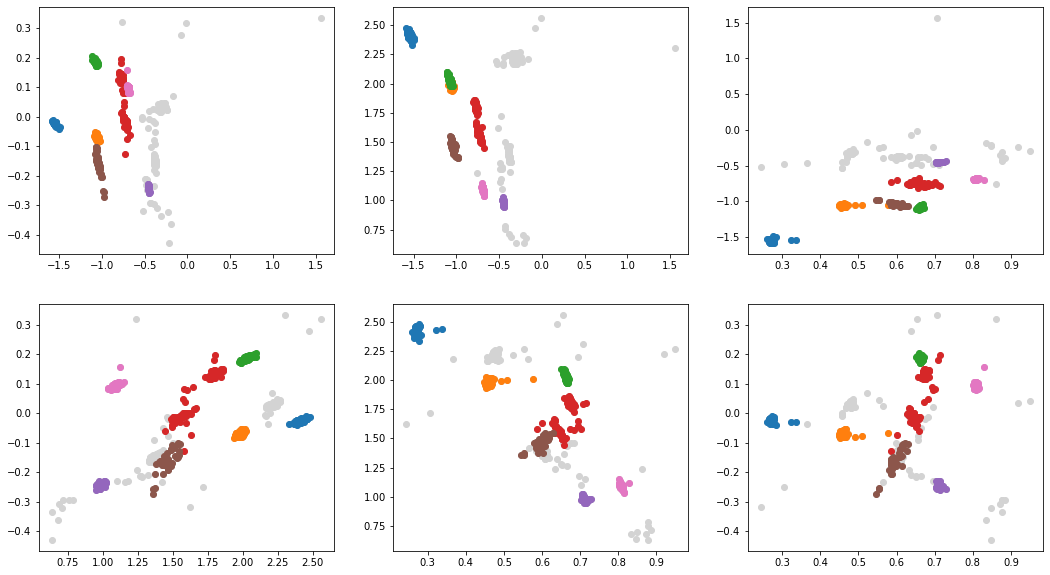

0.6


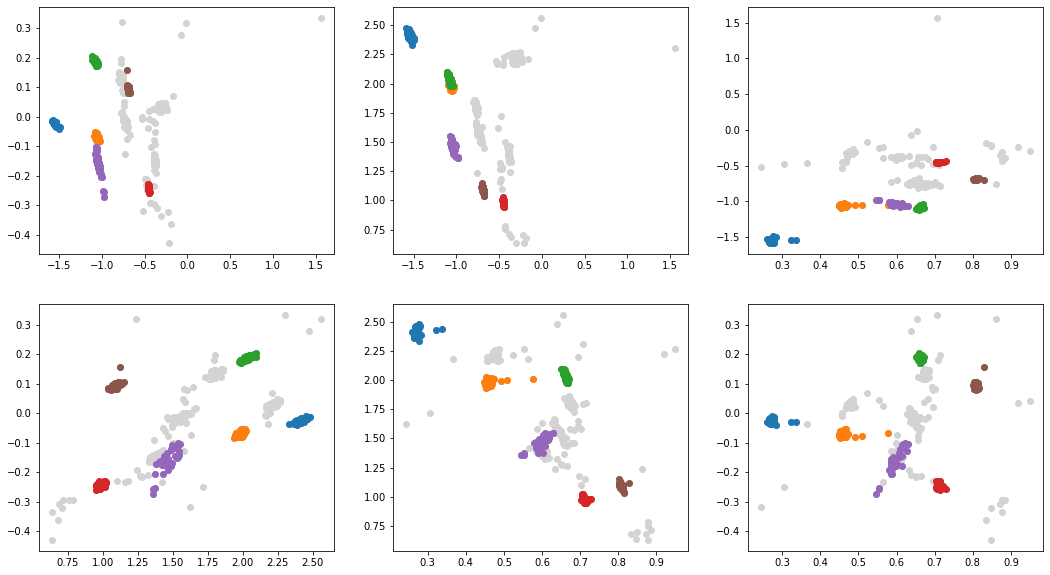

0.7


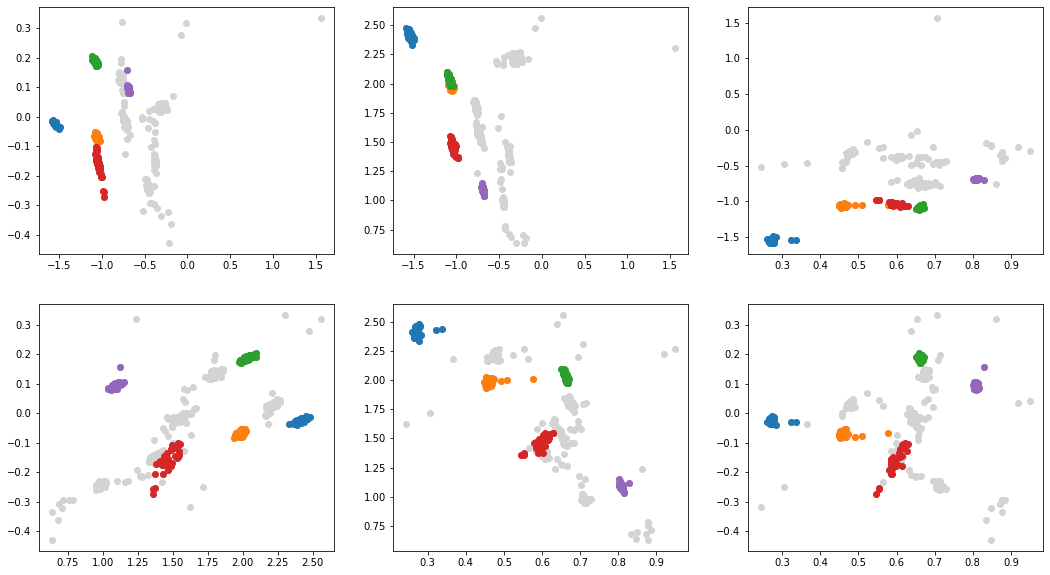

0.8


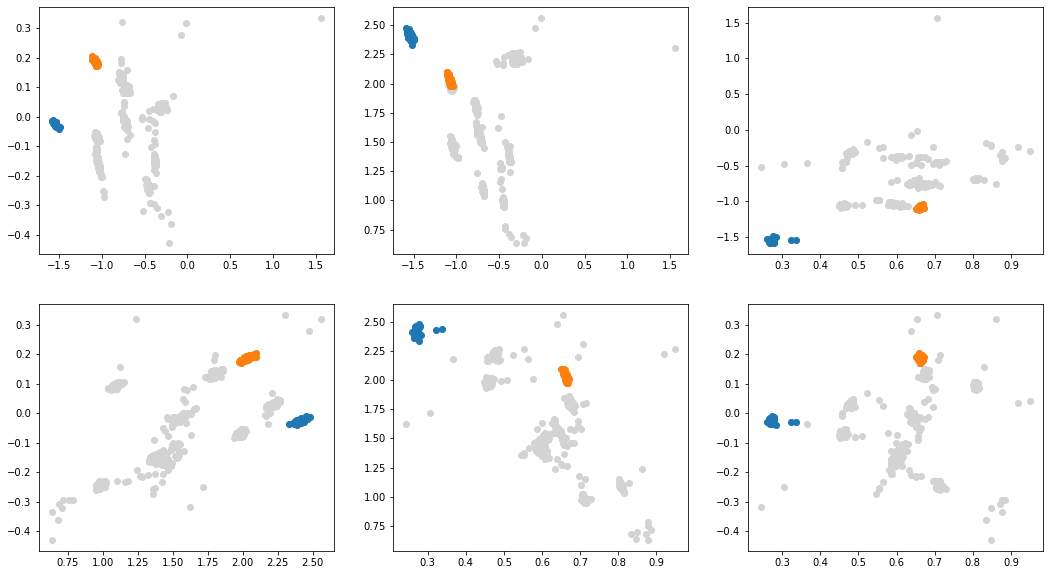

0.9


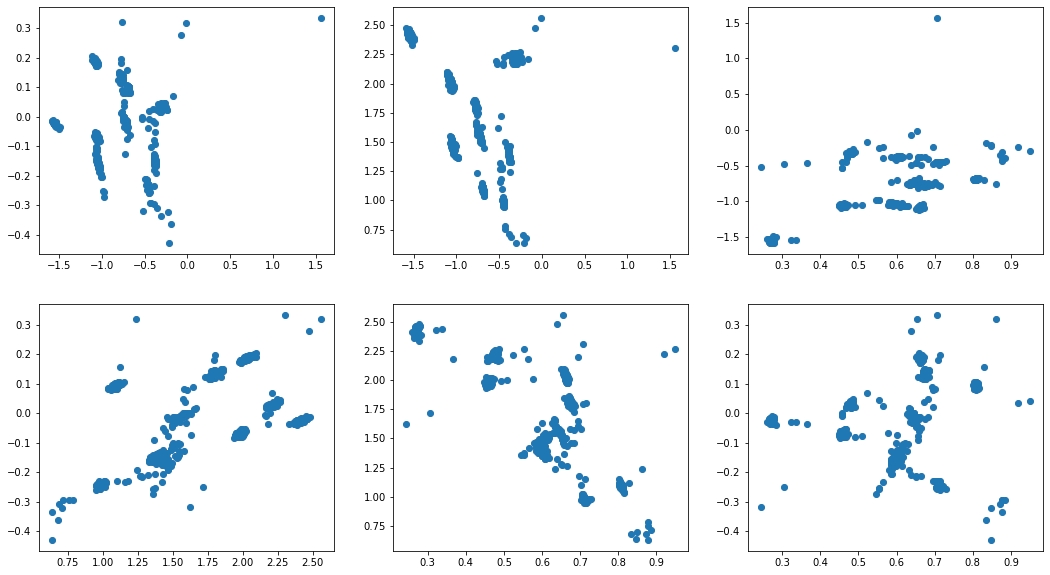

0.99


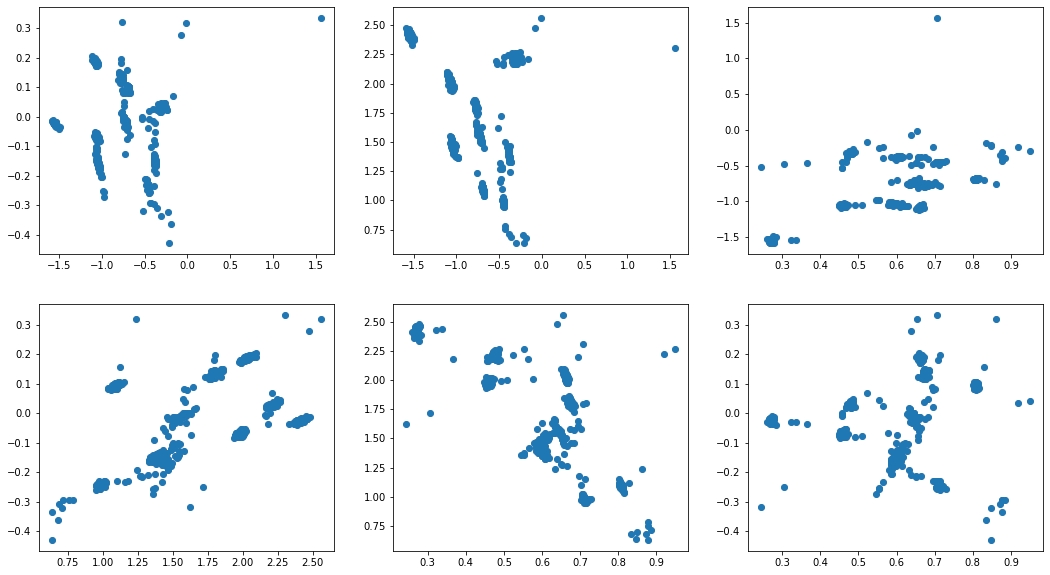

In [13]:
# OPTICS Method Results
for i in n_opt:
        xi = i
        print(xi)
        string = 'Sim_OPT_labels'+str(xi)+'.csv'
        OPT_labels = np.loadtxt(string , delimiter=',')
        mx = np.max(OPT_labels)
        plt.rcParams.update({'font.size':10})
        fig, ax = plt.subplots(2, 3, figsize=(18,10))
        plotClust2(data, 'lightgrey')
        for i in np.arange(mx+1):
            mask = (OPT_labels == i)
            plotClust(data[mask])
        plt.show()

In [14]:
E_scr0  = np.loadtxt('E_scrambled.csv', delimiter=',')
Lz_scr0 = np.loadtxt('Lz_scrambled.csv', delimiter=',')
L_scr0  = np.loadtxt('L_scrambled.csv', delimiter=',')
e_scr0  = np.loadtxt('e_scrambled.csv', delimiter=',')

# new (to select a subset of the size of the real data)
datatemp= np.array((E_scr0, Lz_scr0, L_scr0, e_scr0)).T
np.random.shuffle(datatemp)
E_scr = (datatemp.T[0,:])[0:202450]
Lz_scr= (datatemp.T[1,:])[0:202450]
L_scr = (datatemp.T[2,:])[0:202450]
e_scr = (datatemp.T[3,:])[0:202450]
# end of new
isstream_scr = -1*np.ones(len(e_scr))

Es  = np.append(data[:,0], E_scr)
Lzs = np.append(data[:,1], Lz_scr)
Ls  = np.append(data[:,2], L_scr)
es  = np.append(data[:,3], e_scr)
isstream = np.append(Data[:,7], isstream_scr)

DatawBack = np.array((Es, Lzs, Ls, es, isstream)).T
np.random.shuffle(DatawBack)
np.savetxt('10streamsNbackground_E_Lz_L_e_label.csv',DatawBack, delimiter=',')

In [15]:
DatawBack  = np.loadtxt('10streamsNbackground_E_Lz_L_e_label.csv', delimiter=',')
DatawBack.shape

(202950, 5)

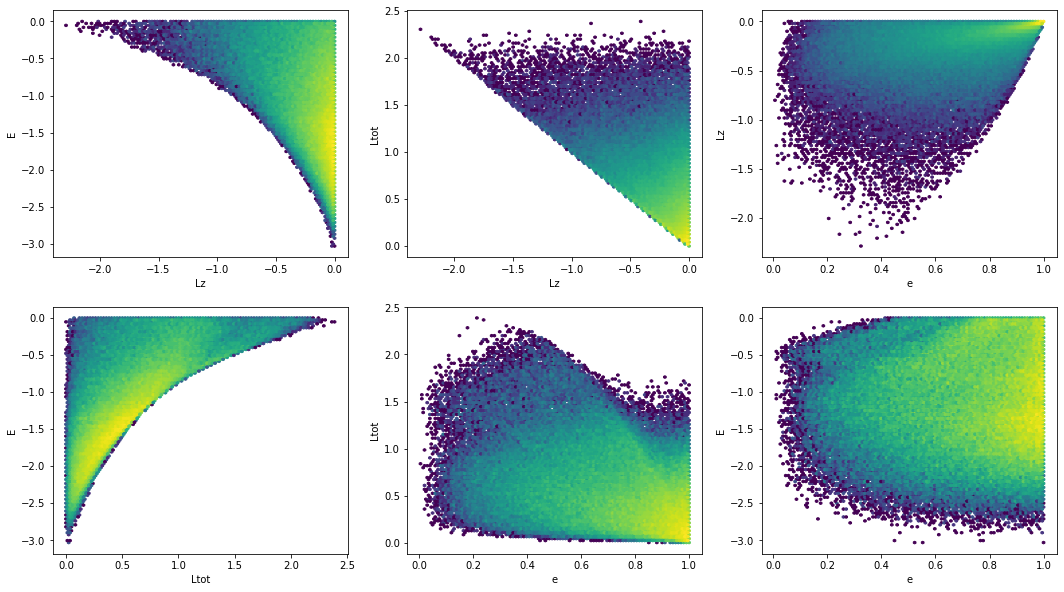

In [16]:
%matplotlib inline 
plt.rcParams.update({'font.size':10})
fig, ax = plt.subplots(2, 3, figsize=(18,10))

maskB = DatawBack[:,4] == -1
background = DatawBack[maskB]

ax[0][0].hexbin(background[:,1], background[:,0], bins='log')
ax[0][1].hexbin(background[:,1], background[:,2], bins='log')
ax[0][2].hexbin(background[:,3], background[:,1], bins='log')
ax[1][0].hexbin(background[:,2], background[:,0], bins='log')
ax[1][1].hexbin(background[:,3], background[:,2], bins='log')
ax[1][2].hexbin(background[:,3], background[:,0], bins='log')

ax[0][0].set_xlabel('Lz')
ax[0][1].set_xlabel('Lz')
ax[0][2].set_xlabel('e')
ax[1][0].set_xlabel('Ltot')
ax[1][1].set_xlabel('e')
ax[1][2].set_xlabel('e')

ax[0][0].set_ylabel('E')
ax[0][1].set_ylabel('Ltot')
ax[0][2].set_ylabel('Lz')
ax[1][0].set_ylabel('E')
ax[1][1].set_ylabel('Ltot')
ax[1][2].set_ylabel('E');


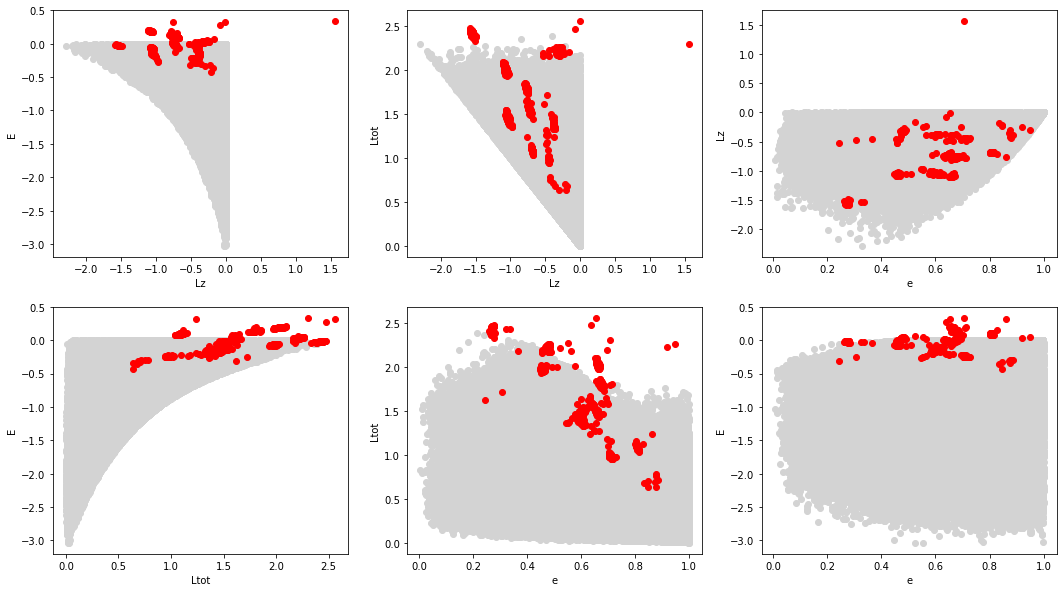

In [17]:
DatawBack  = np.loadtxt('10streamsNbackground_E_Lz_L_e_label.csv', delimiter=',')

%matplotlib inline 
plt.rcParams.update({'font.size':10})
fig, ax = plt.subplots(2, 3, figsize=(18,10))

plotClust2(background, 'lightgrey')


for i in np.arange(10):
    mask = DatawBack[:,4] == i
    plotClust2(DatawBack[mask], 'r')

ax[0][0].set_xlabel('Lz')
ax[0][1].set_xlabel('Lz')
ax[0][2].set_xlabel('e')
ax[1][0].set_xlabel('Ltot')
ax[1][1].set_xlabel('e')
ax[1][2].set_xlabel('e')

ax[0][0].set_ylabel('E')
ax[0][1].set_ylabel('Ltot')
ax[0][2].set_ylabel('Lz')
ax[1][0].set_ylabel('E')
ax[1][1].set_ylabel('Ltot')
ax[1][2].set_ylabel('E');


In [18]:
maskC = DatawBack[:,4] != -1
Clusters = DatawBack[maskC]
maskB = DatawBack[:,4] == -1
background = DatawBack[maskB]
dataWB = DatawBack[:,0:4]
dataWB.shape

(202950, 4)

In [19]:
# DBScan Method
n_DB = [0.001,0.005,0.005,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.1] 
for i in n_DB:
        eps = i
        db = DBSCAN(eps=eps, min_samples=20).fit(dataWB)
        DB_labels = db.labels_
        string = 'SimWB_DB_labels'+str(eps)+'.csv'
        np.savetxt(string, DB_labels , delimiter=',')

0.001


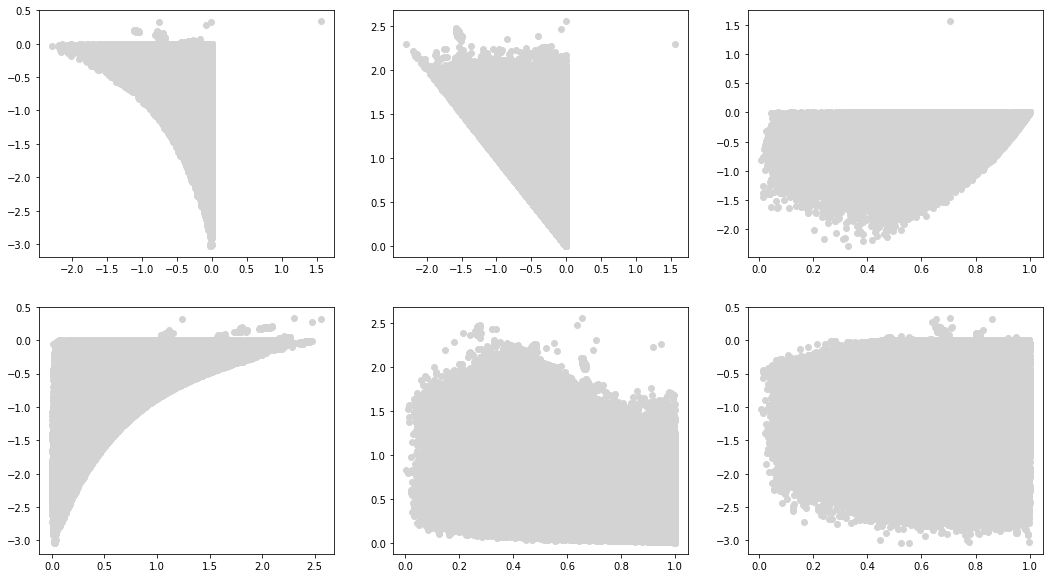

0.005


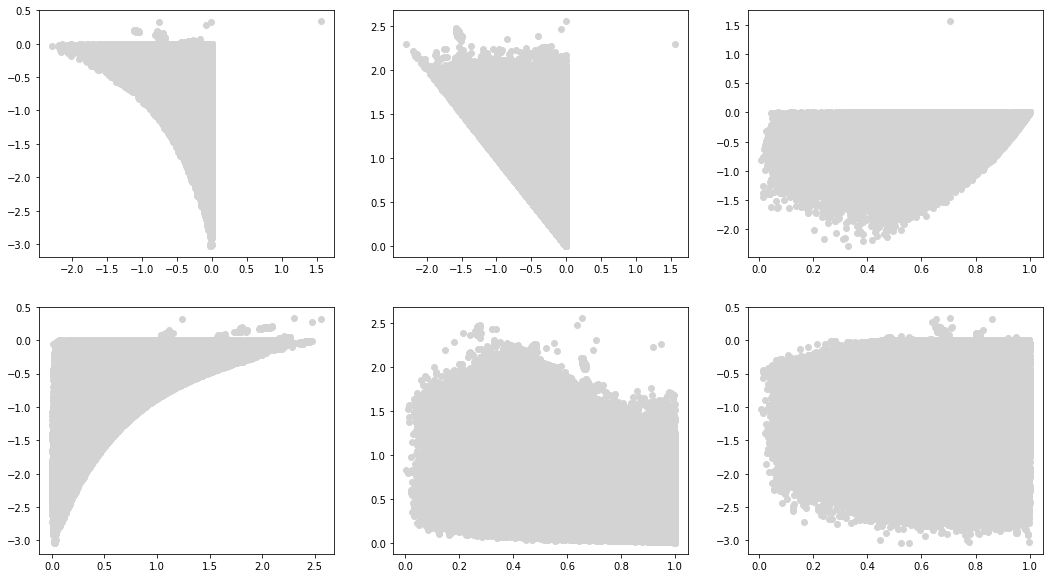

0.005


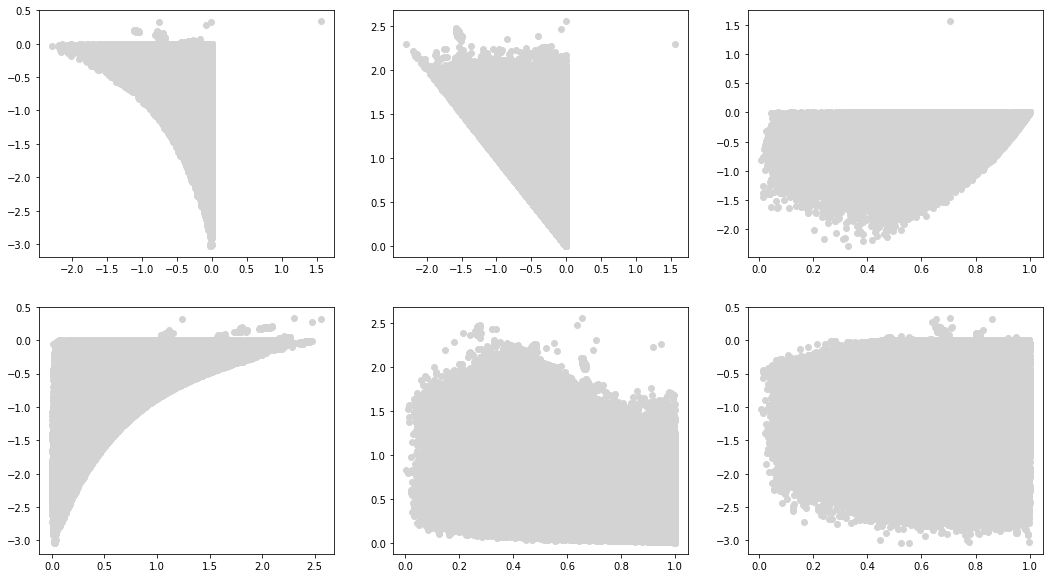

0.007


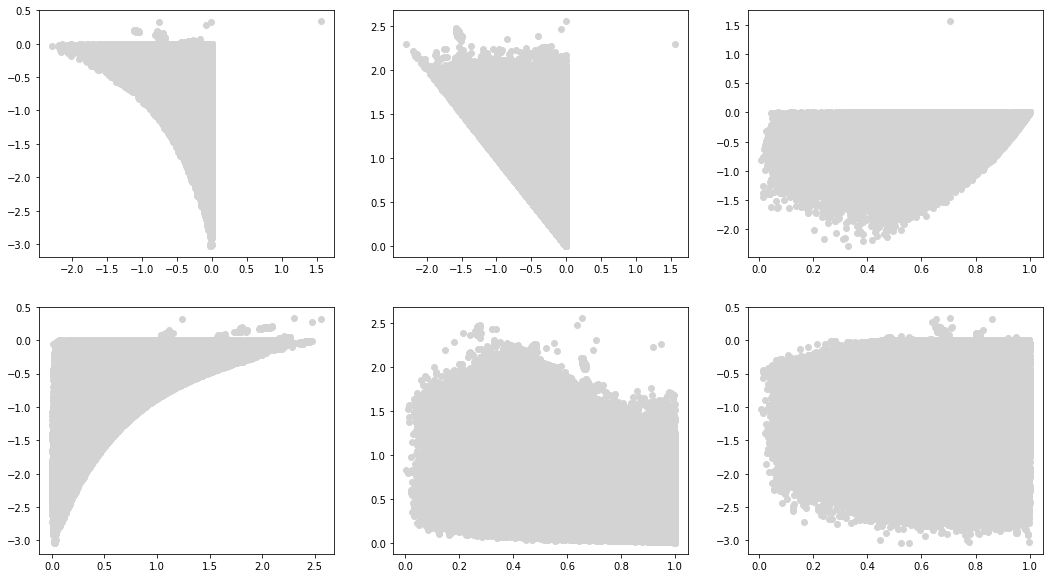

0.008


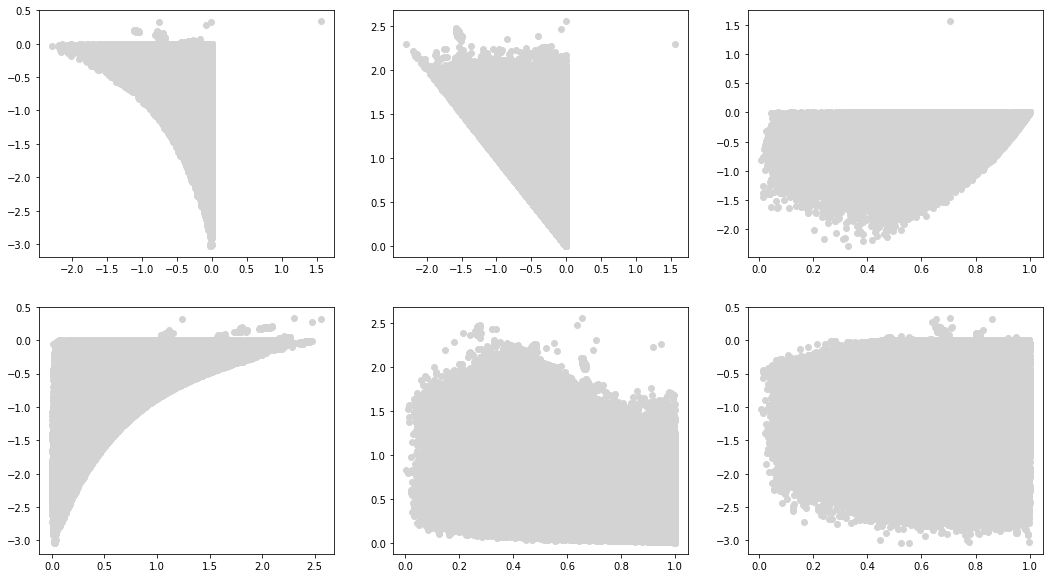

0.009


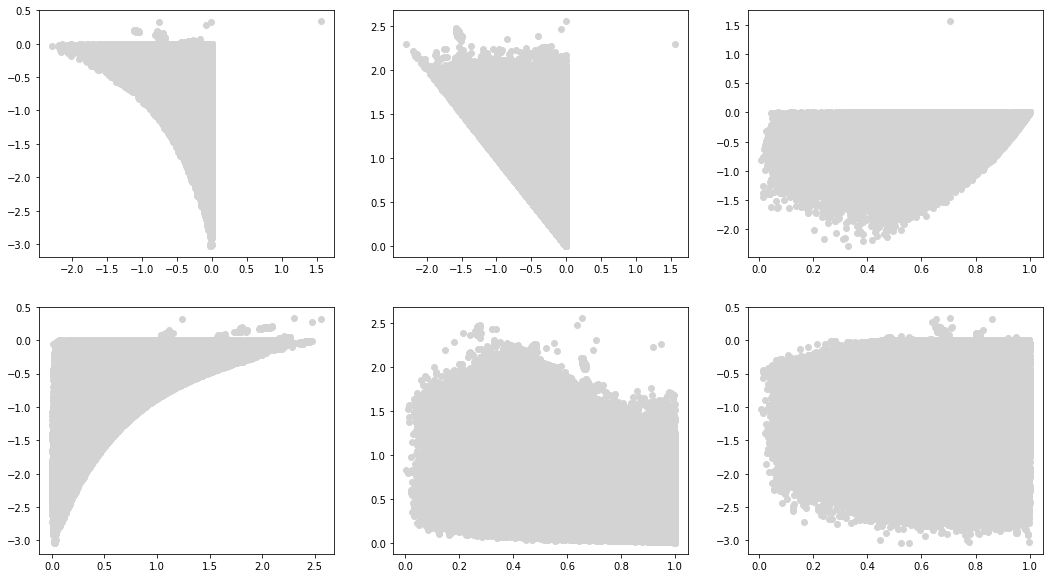

0.01


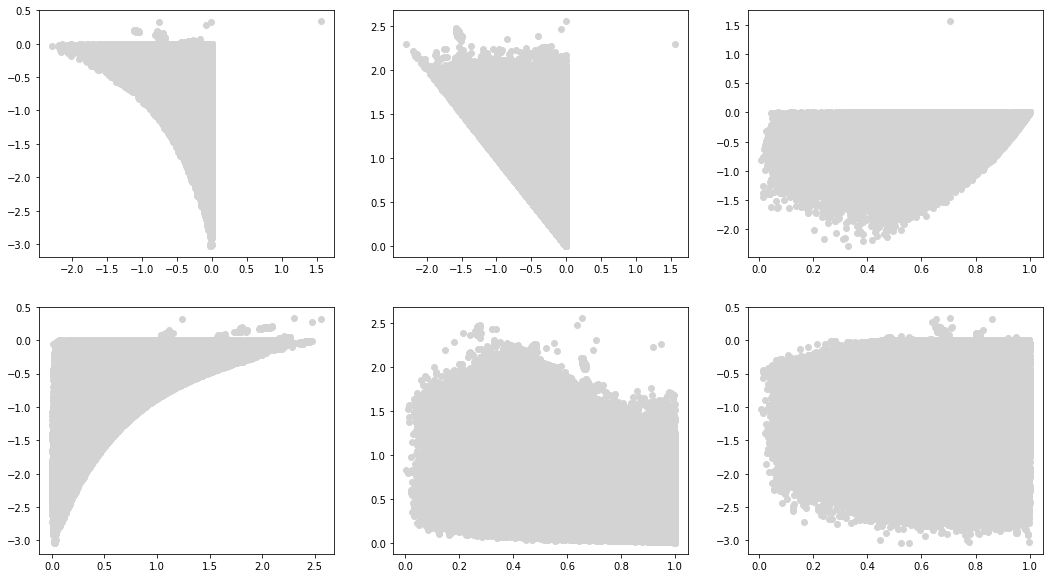

0.02


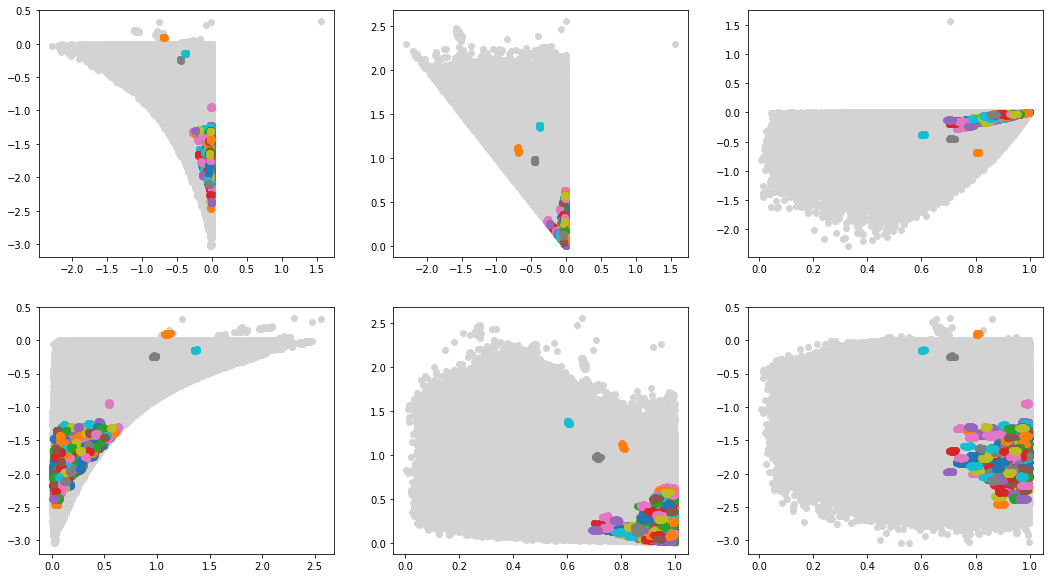

0.03


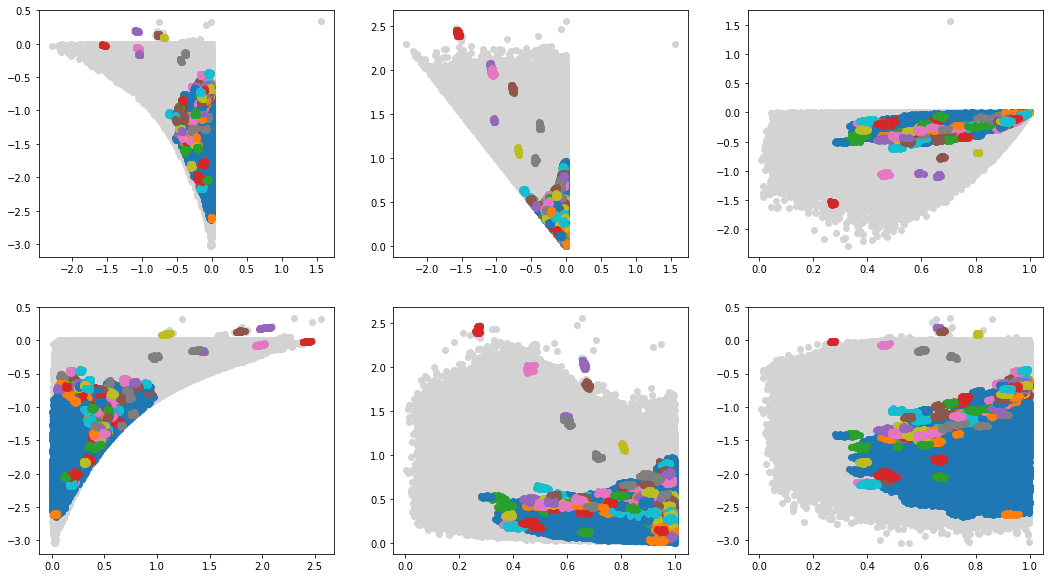

0.04


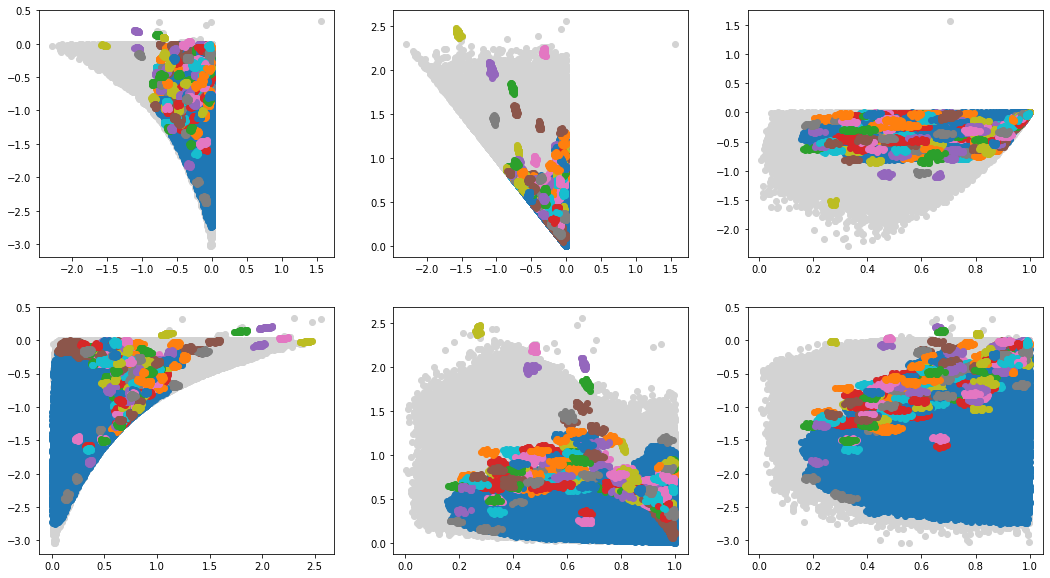

0.05


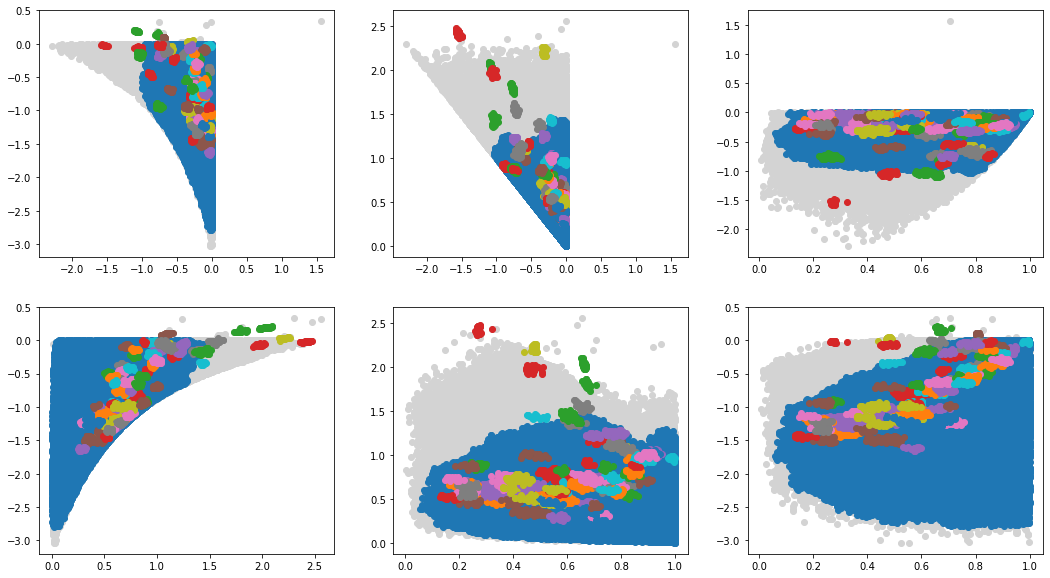

0.1


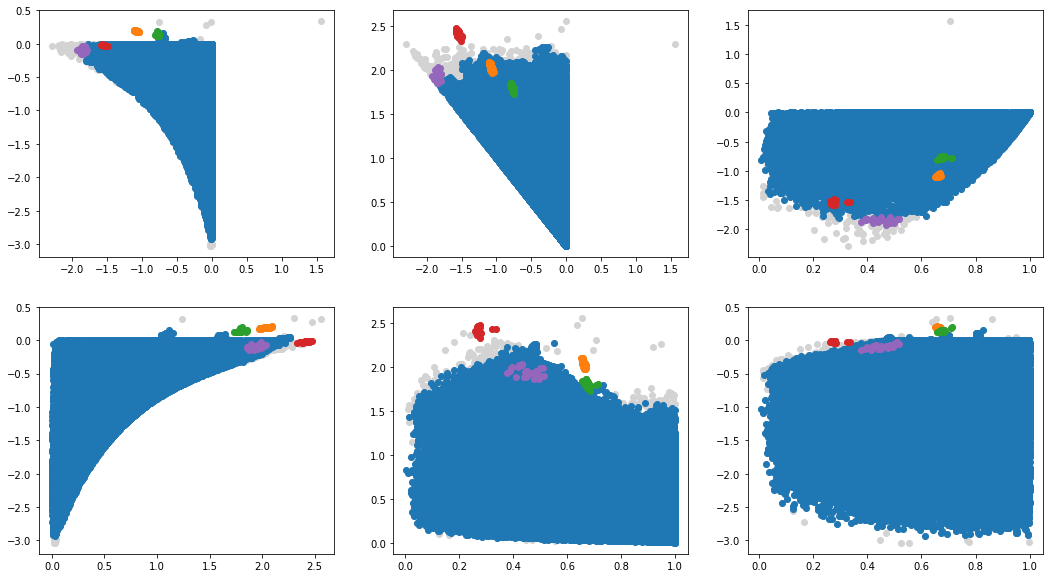

In [21]:
# DBScan Method Results
for i in n_DB:
        eps = i
        print(eps)
        string = 'SimWB_DB_labels'+str(eps)+'.csv'
        DB_labels = np.loadtxt(string , delimiter=',')
        mx = np.max(DB_labels)
        plt.rcParams.update({'font.size':10})
        fig, ax = plt.subplots(2, 3, figsize=(18,10))
        plotClust2(dataWB, 'lightgrey')
        for i in np.arange(mx+1):
            mask = (DB_labels == i)
            plotClust(dataWB[mask])
        plt.show()

In [22]:
# OPTICS Method
#n_opt=[0.22,0.25,0.27] 
for i in n_opt:
        xi = i
        opt = OPTICS(xi=xi, min_samples=20).fit(dataWB)
        OPT_labels = opt.labels_
        string = 'SimWB_OPT_labels'+str(xi)+'.csv'
        np.savetxt(string, OPT_labels , delimiter=',')

0.001


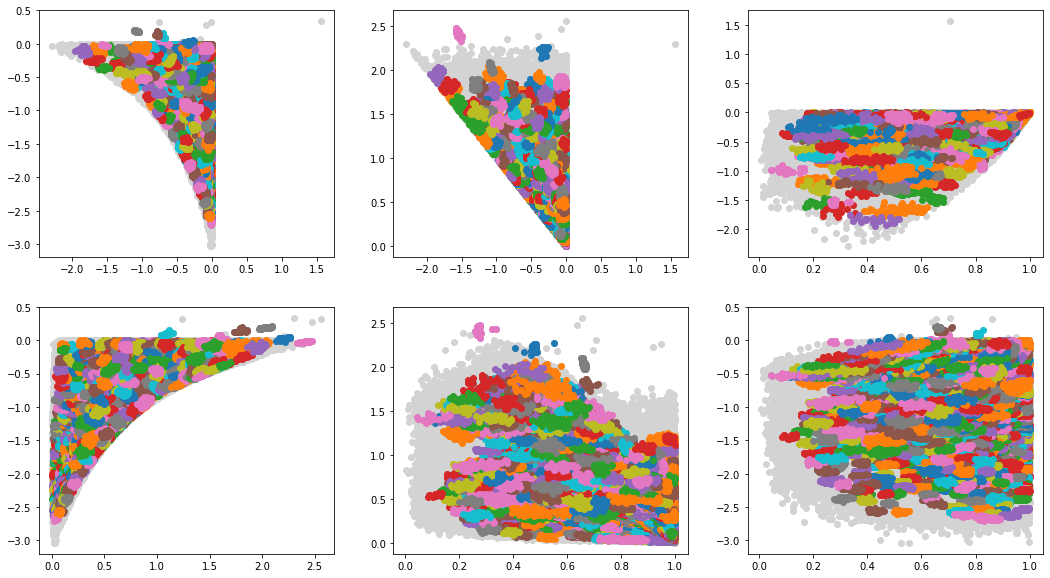

0.1


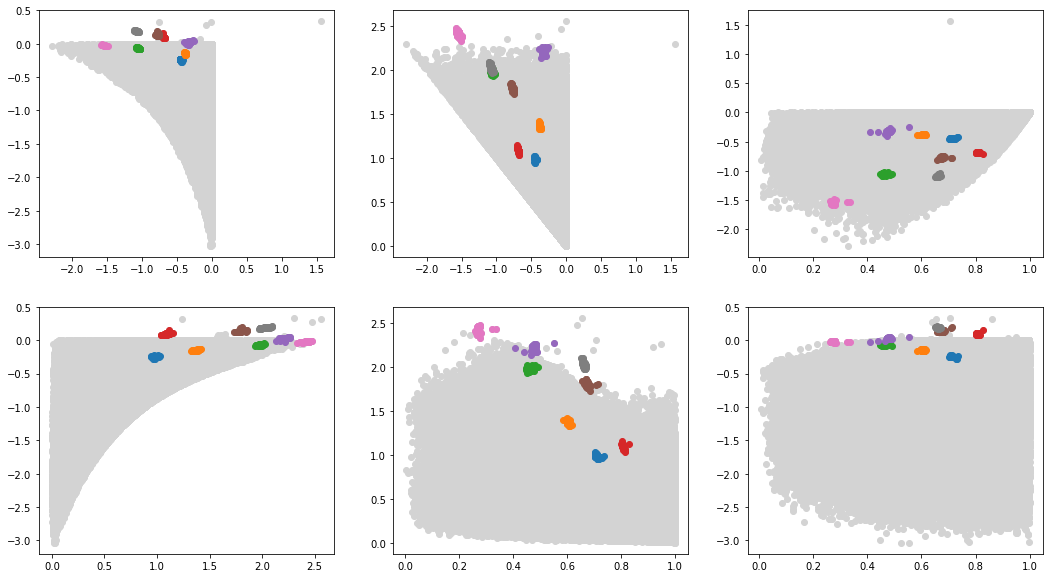

0.5


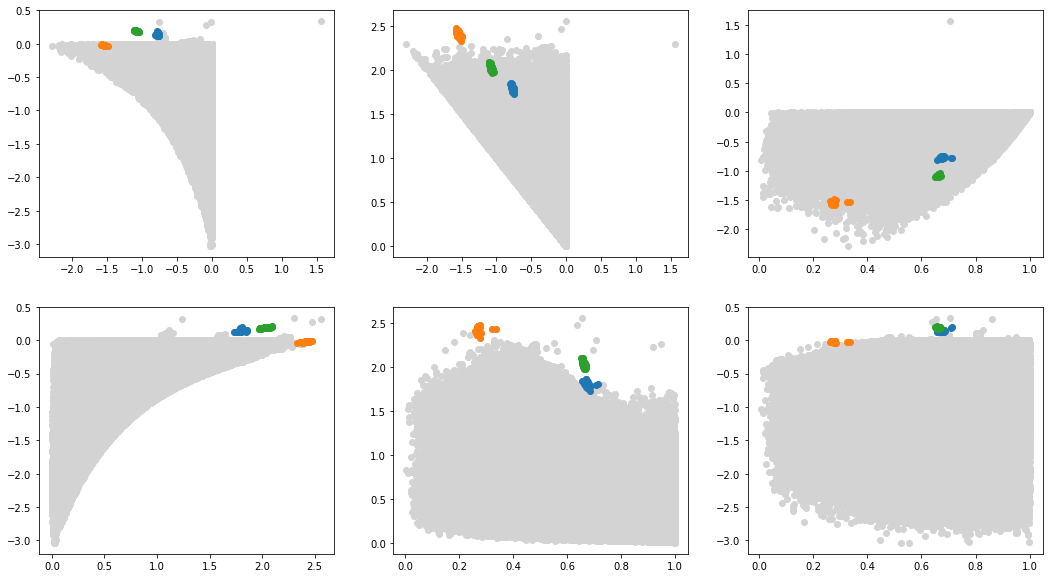

0.6


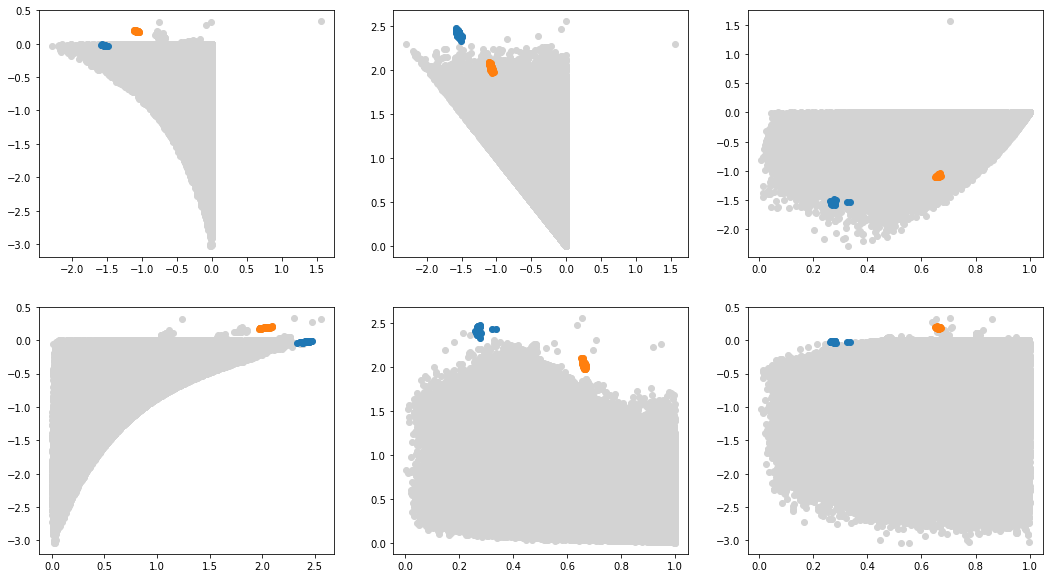

0.7


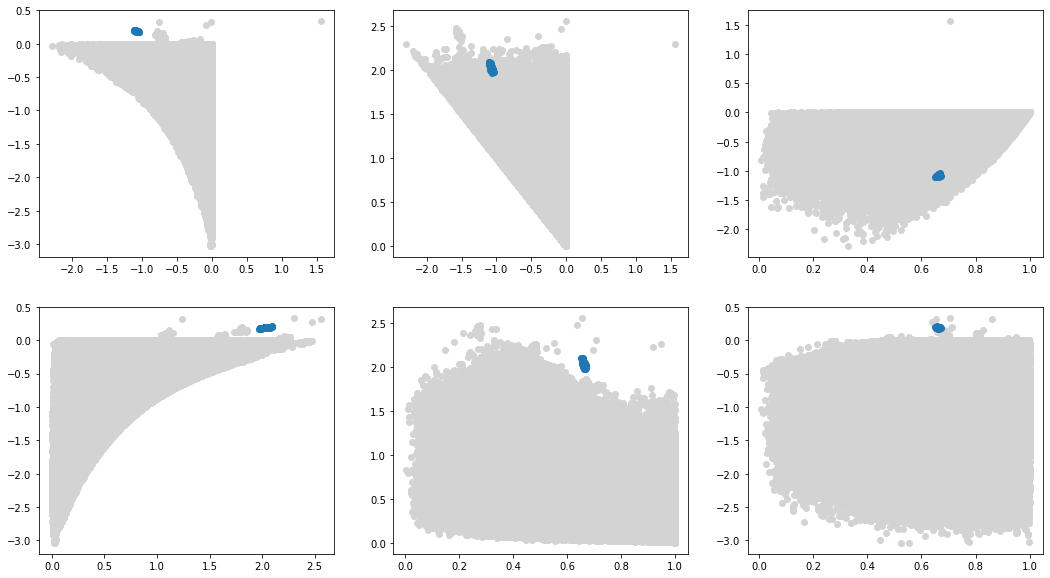

0.8


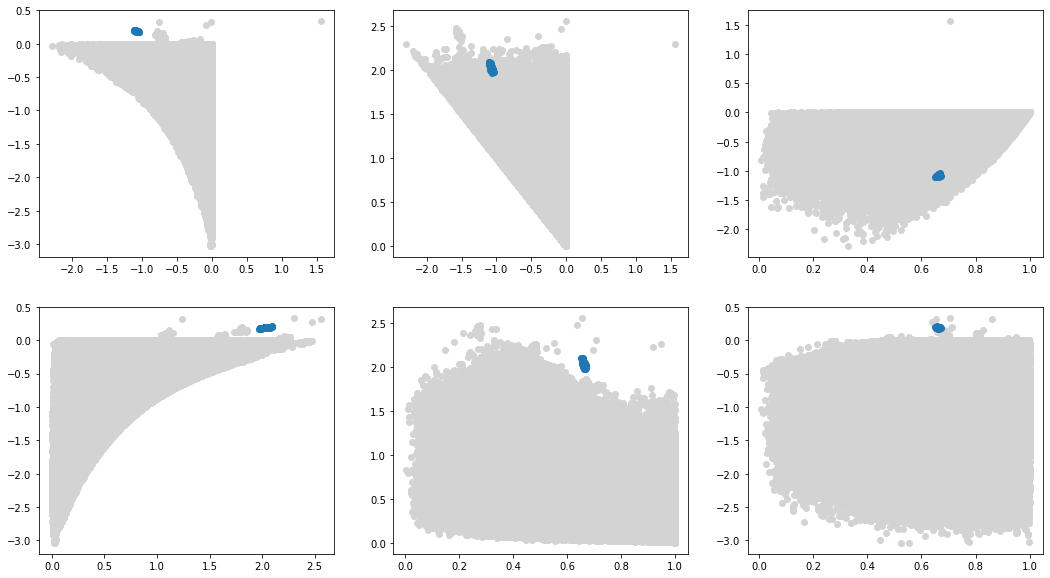

0.9


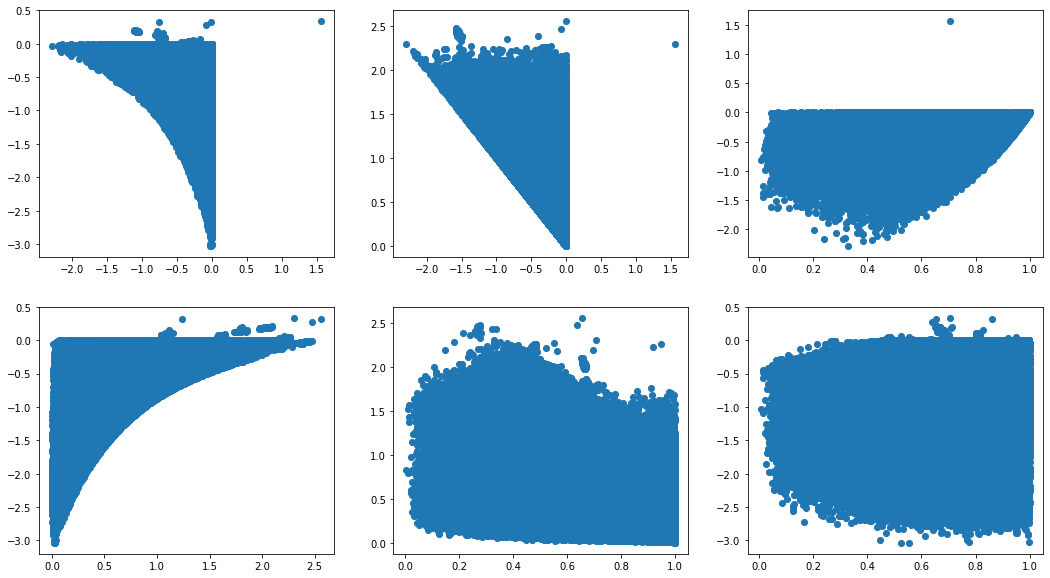

0.99


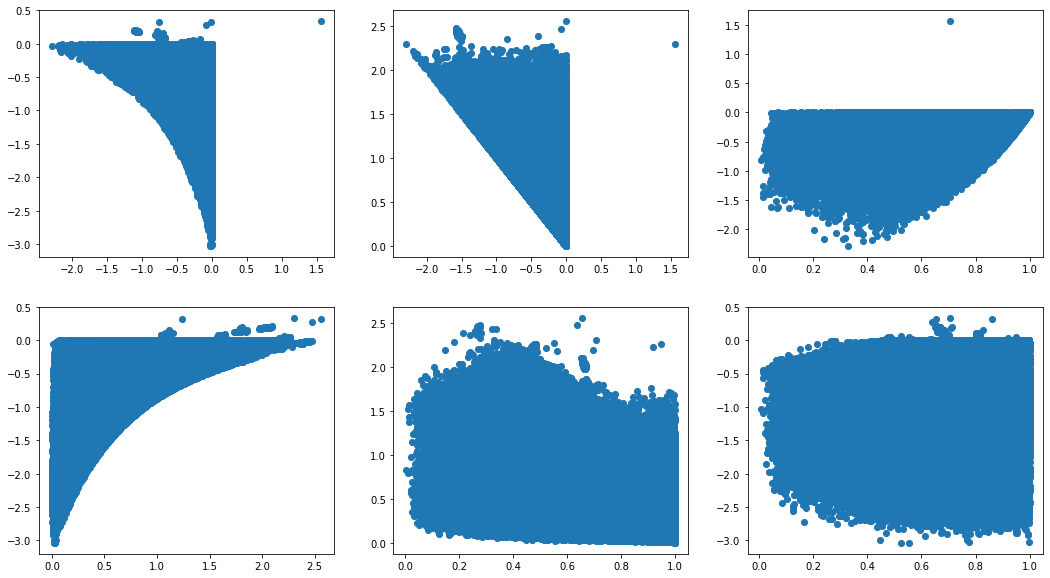

In [23]:
# OPTICS Method Results
#n_opt=[0.01,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.9] 
for i in n_opt:
        xi = i
        print(xi)
        string = 'SimWB_OPT_labels'+str(xi)+'.csv'
        OPT_labels = np.loadtxt(string , delimiter=',')
        mx = np.max(OPT_labels)
        plt.rcParams.update({'font.size':10})
        fig, ax = plt.subplots(2, 3, figsize=(18,10))
        plotClust2(dataWB, 'lightgrey')
        for i in np.arange(mx+1):
            mask = (OPT_labels == i)
            plotClust(dataWB[mask])
        plt.show()

In [24]:
DBstats = np.empty((3, len(n_DB)))
for i in np.arange(len(n_DB)):
        eps = n_DB[i]
        s = 'SimWB_DB_labels'+str(eps)+'.csv'
        l = np.loadtxt(s , delimiter=',')
        TruePos = np.sum(np.logical_and(l != -1, maskC))
        TPRdenom = np.sum(maskC)
        TPR = TruePos/TPRdenom
        FalsePos = np.sum(np.logical_and(l != -1, np.logical_not(maskC)))
        FPRdenom = np.sum(np.logical_not(maskC))
        FPR = FalsePos/FPRdenom
        DBstats[:,i]= np.array((eps,TPR,FPR))
#print(DBstats.T)

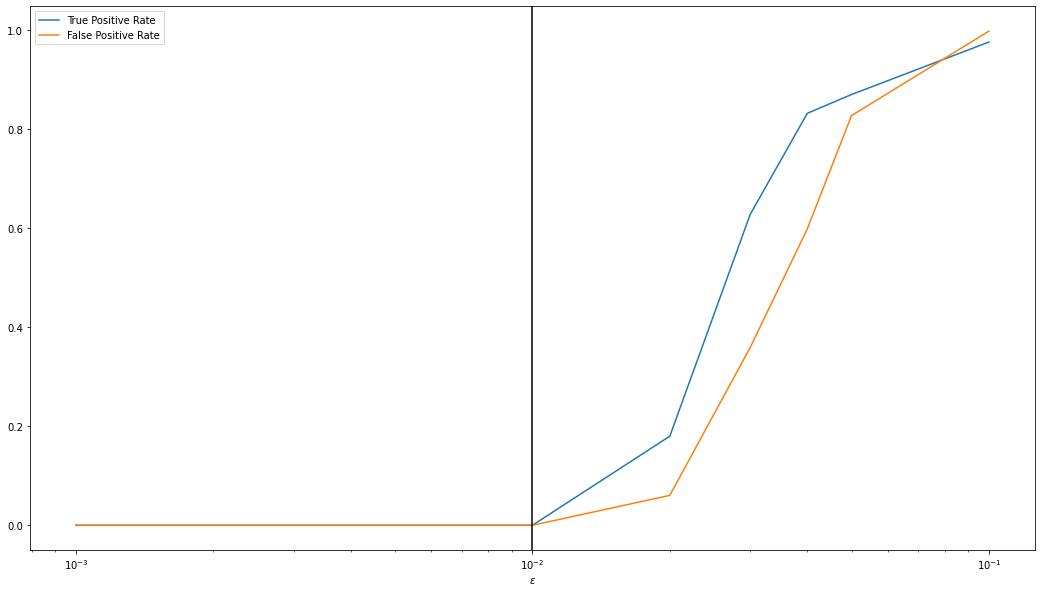

In [25]:
plt.subplots(figsize=(18,10))
plt.plot(DBstats[0,:], DBstats[1,:])
plt.plot(DBstats[0,:], DBstats[2,:])
plt.axvline(x=0.01, ymin=0, ymax=1, c='k')
plt.xscale("log")
plt.legend(('True Positive Rate', 'False Positive Rate'))
plt.xlabel(r'$\epsilon$');

In [26]:
#n_opt=[0.01,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.22,0.25,0.27,0.3,0.4,0.5,0.9] 

OPTstats = np.empty((3, len(n_opt)))
for i in np.arange(len(n_opt)):
        xi = n_opt[i]
        s = 'SimWB_OPT_labels'+str(xi)+'.csv'
        l = np.loadtxt(s , delimiter=',')
        TruePos = np.sum(np.logical_and(l != -1, maskC))
        TPRdenom = np.sum(maskC)
        TPR = TruePos/TPRdenom
        FalsePos = np.sum(np.logical_and(l != -1, np.logical_not(maskC)))
        FPRdenom = np.sum(np.logical_not(maskC))
        FPR = FalsePos/FPRdenom
        OPTstats[:,i]= np.array((xi,TPR,FPR))
print(OPTstats.T)

[[1.00000000e-03 9.10000000e-01 2.60400099e-01]
 [1.00000000e-01 7.12000000e-01 3.95159299e-05]
 [5.00000000e-01 2.98000000e-01 0.00000000e+00]
 [6.00000000e-01 2.00000000e-01 0.00000000e+00]
 [7.00000000e-01 1.00000000e-01 0.00000000e+00]
 [8.00000000e-01 1.00000000e-01 0.00000000e+00]
 [9.00000000e-01 1.00000000e+00 1.00000000e+00]
 [9.90000000e-01 1.00000000e+00 1.00000000e+00]]


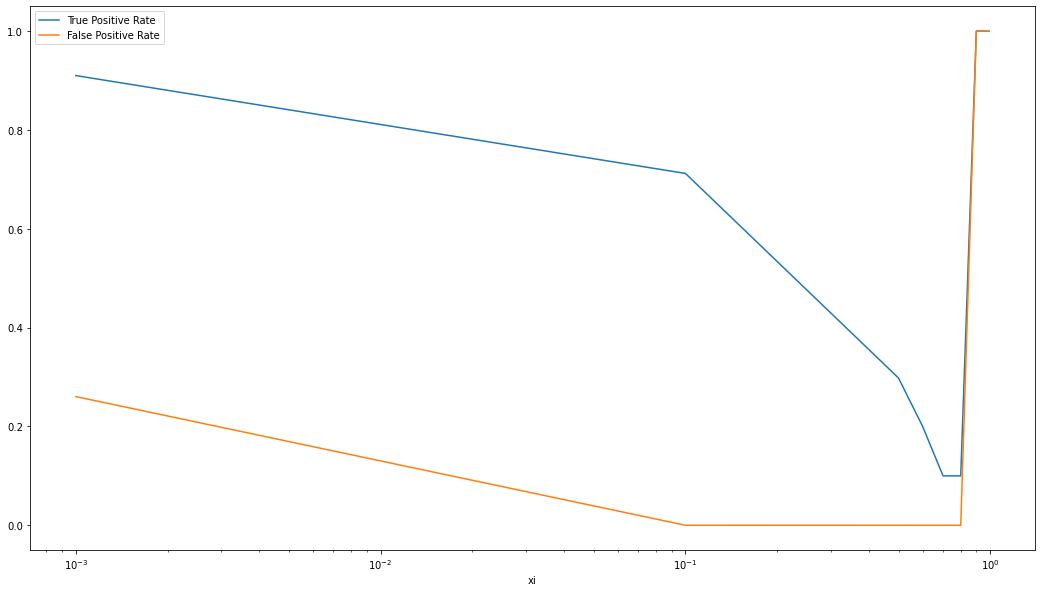

In [28]:
plt.subplots(figsize=(18,10))
plt.plot(OPTstats[0,:], OPTstats[1,:])
plt.plot(OPTstats[0,:], OPTstats[2,:])
plt.xscale("log")
plt.legend(('True Positive Rate', 'False Positive Rate'))
plt.xlabel('xi');